# 1. Import Libraries

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 2. Import dataset and make a copy

In [168]:
raw = pd.read_csv('after_analysis.csv')

In [169]:
data = raw.copy()

# 3. Basic EDA

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118564 entries, 0 to 118563
Data columns (total 56 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118564 non-null  int64  
 1   client_id                     118564 non-null  object 
 2   user_id                       118564 non-null  object 
 3   first_trial_appointment_date  17410 non-null   object 
 4   first_payment_date            807 non-null     object 
 5   os                            118564 non-null  object 
 6   tutor                         118564 non-null  object 
 7   job                           118564 non-null  object 
 8   task_class                    118564 non-null  float64
 9   average_score                 118564 non-null  float64
 10  homework_done                 118564 non-null  int64  
 11  paywall_paid                  118564 non-null  bool   
 12  desktop_enter                 118564 non-nul

In [171]:
# check nulls and dupes

In [172]:
null_values_table = pd.DataFrame(columns = ['Feature', 'per_nulls'])

In [173]:
col = data.columns

In [174]:
type(data.shape[0])

int

In [175]:
null_values = pd.DataFrame(columns = ['feature', 'per_nulls'])

In [176]:
for i in col:
    p_null = ((data[i].isna().sum()/data.shape[0])*100).round(2)
    new_row = pd.DataFrame({'feature': [i], 'per_nulls': [p_null]})
    null_values = pd.concat([null_values, new_row], ignore_index = True)

In [177]:
print(null_values)

                         feature  per_nulls
0                     Unnamed: 0       0.00
1                      client_id       0.00
2                        user_id       0.00
3   first_trial_appointment_date      85.32
4             first_payment_date      99.32
5                             os       0.00
6                          tutor       0.00
7                            job       0.00
8                     task_class       0.00
9                  average_score       0.00
10                 homework_done       0.00
11                  paywall_paid       0.00
12                 desktop_enter       0.00
13             add_homework_done       0.00
14                     call_date       0.00
15              first_visit_date       0.00
16                   is_big_city       0.00
17           first_trial_missing       0.00
18            first_payment_flag       0.00
19                     call_year       0.00
20                    call_month       0.00
21               call_month_name

In [178]:
dupe_values = pd.DataFrame(columns = ['feature', 'per_dupes'])

In [179]:
for i in col:
    p_dupe = ((data[i].duplicated().sum()/data.shape[0])*100).round(2)
    new_dupe = pd.DataFrame({'feature': [i], 'per_dupes': [p_dupe]})
    dupe_values = pd.concat([dupe_values, new_dupe], ignore_index = True)

In [180]:
print(dupe_values)

                         feature  per_dupes
0                     Unnamed: 0       0.00
1                      client_id       0.00
2                        user_id       0.00
3   first_trial_appointment_date      89.45
4             first_payment_date      99.32
5                             os      99.99
6                          tutor     100.00
7                            job      99.99
8                     task_class      99.99
9                  average_score      96.33
10                 homework_done      99.92
11                  paywall_paid     100.00
12                 desktop_enter     100.00
13             add_homework_done      99.94
14                     call_date      87.06
15              first_visit_date      66.30
16                   is_big_city     100.00
17           first_trial_missing     100.00
18            first_payment_flag     100.00
19                     call_year     100.00
20                    call_month     100.00
21               call_month_name

# 4. Categorical Vs Numerical Features

In [181]:
num_cols = data.select_dtypes(include = ['int', 'float64', 'bool']).columns.tolist()

In [182]:
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

In [183]:
print(num_cols)

['Unnamed: 0', 'task_class', 'average_score', 'homework_done', 'paywall_paid', 'desktop_enter', 'add_homework_done', 'is_big_city', 'first_trial_missing', 'first_payment_flag', 'call_year', 'call_month', 'call_day', 'call_week', 'call_hour', 'hour', 'year', 'month', 'day', 'week', 'trial_year', 'trial_month', 'trial_day', 'trial_hour', 'trial_week', 'payment_year', 'payment_month', 'payment_day', 'payment_hour', 'payment_week', 'visit_year', 'visit_month', 'visit_day', 'visit_hour', 'visit_week']


In [184]:
print(cat_cols)

['client_id', 'user_id', 'first_trial_appointment_date', 'first_payment_date', 'os', 'tutor', 'job', 'call_date', 'first_visit_date', 'call_month_name', 'call_day_name', 'day_name', 'trial_date', 'trial_month_name', 'trial_day_name', 'payment_date', 'payment_month_name', 'payment_day_name', 'visit_date', 'visit_month_name', 'visit_day_name']


### 5.2.1 Numerical Analysis

Compute correlation matrix (Pearson, Spearman if non-linear)

Plot scatterplots (with regression line)

Plot pairplots for grouped numeric fields

Compute covariance

Check correlation heatmap

Detect multicollinearity (VIF later in modelling stage, not now)

Identify linear vs non-linear relationships

Examples you MUST include:

task_class vs average_score

average_score vs homework_done

homework_done vs add_homework_done

# 4. Bivariate Analysis

## 4.1. Numerical Vs Numerical Analysis

### 4.1.0 General Information

Approach:
    
    1) Normality test
    2) Correlation Matrix ( Pearson + Spearman)
    3) Top Strongest Correlation
    4) Scatterplots for key pairs with regression line
    5) Non linearity check + outlier behaviour
    6) Regression Summary for atleast meaningful pair

| #  | Correlation Type                      | Meaning / What It Measures                                         | When to Use                                      | Python Syntax                                  |
| -- | ------------------------------------- | ------------------------------------------------------------------ | ------------------------------------------------ | ---------------------------------------------- |
| 1  | **Pearson Correlation**               | Measures **linear** relationship; assumes normal distribution      | Continuous numeric data, linear trend            | `df.corr(method='pearson')`                    |
| 2  | **Spearman Rank Correlation**         | Correlation based on **rank order**; captures monotonic trends     | Non-linear monotonic relationships, ordinal data | `df.corr(method='spearman')`                   |
| 3  | **Kendall Tau Correlation**           | Measures strength and direction of **ordinal association**         | Small samples, tied ranks, ordinal variables     | `df.corr(method='kendall')`                    |
| 4  | **Point-Biserial Correlation**        | Correlation between **continuous variable & binary variable**      | Binary flag vs numeric score                     | `scipy.stats.pointbiserialr(x, y)`             |
| 5  | **Distance Correlation**              | Detects **non-linear relationships** even if no linear correlation | Any numeric pair, non-linear patterns            | `dcor.distance_correlation(x, y)`              |
| 6  | **Cosine Similarity**                 | Measures angle between vectors; scale independent                  | High-dimensional numeric vectors                 | `sklearn.metrics.pairwise.cosine_similarity()` |
| 7  | **Mutual Information (MI)**           | Measures shared information; captures non-linear dependency        | Complex relationships & feature selection        | `mutual_info_regression(X, y)`                 |
| 8  | **R² (Coefficient of Determination)** | % of variance in one variable explained by another                 | Regression-based dependency strength             | `sklearn.metrics.r2_score(y_true, y_pred)`     |
| 9  | **Covariance**                        | Direction & degree to which variables vary together                | Raw unscaled relationship, before correlation    | `df.cov()`                                     |
| 10 | **Biweight Midcorrelation**           | Robust correlation resistant to outliers                           | Skewed or heavy-tailed numeric data              | `pingouin.corr(x, y, method='bicor')`          |


### 4.1.1 Listing down Numerical columns

In [185]:
list_of_num_columns =  [num_cols]
list_of_num_columns

[['Unnamed: 0',
  'task_class',
  'average_score',
  'homework_done',
  'paywall_paid',
  'desktop_enter',
  'add_homework_done',
  'is_big_city',
  'first_trial_missing',
  'first_payment_flag',
  'call_year',
  'call_month',
  'call_day',
  'call_week',
  'call_hour',
  'hour',
  'year',
  'month',
  'day',
  'week',
  'trial_year',
  'trial_month',
  'trial_day',
  'trial_hour',
  'trial_week',
  'payment_year',
  'payment_month',
  'payment_day',
  'payment_hour',
  'payment_week',
  'visit_year',
  'visit_month',
  'visit_day',
  'visit_hour',
  'visit_week']]

**First lets do analysis for core num columns that are task_class, average_score, homework_done, add_homework_done**

### 4.1.2. Normality Test - Kolmogorov-smirnov test

*Check whether each numerical column is normally distributed.*

In [187]:
core_cols = ['task_class', 'average_score', 'homework_done', 'add_homework_done']
results = []

for col in core_cols:
    x = data[col]

    mu = x.mean()
    sigma = x.std()

    # KS test for normality
    ks_stat, p_value = stats.kstest(x, 'norm', args=(mu, sigma))

    results.append([col, mu, sigma, ks_stat, p_value])

results_df = pd.DataFrame(
    results,
    columns=["Column", "mean_mu", "sigma_stddev", "KS_Statistic", "p_value"]
)

results_df


,Column,mean_mu,sigma_stddev,KS_Statistic,p_value
0,task_class,6.699192,1.861165,0.123967,0.0
1,average_score,77.228817,19.008480,0.115469,0.0
2,homework_done,3.477868,8.247880,0.361887,0.0
3,add_homework_done,0.109384,7.206260,0.493945,0.0


Analysis

Since all the p values are 0 that is < 0.05, we reject normality for all
Since this is not normally distributed we will only take into account spearman correlation istead of pearson

### 4.1.3. Pearson Correlation 

**How to interpret the Pearson correlation coefficient ((r))**

**Strength:** The absolute value of the coefficient indicates the strength of the relationship, where a value closer to 1 is stronger.

Small: \(|r|\) < 0.3

Medium: \(0.3<|r|<0.5\)

Large: \(|r|\) > 0.5

Direction: The sign of the coefficient indicates the direction of the relationship.

Positive (\(r>0\)): As one variable increases, the other tends to increase.

Negative (\(r<0\)): As one variable increases, the other tends to decrease.

For example, elevation and air pressure have a negative correlation. 

#### 4.1.1.1. Core numerical Values

In [42]:
data[['task_class', 'average_score', 'homework_done', 'add_homework_done']].corr(method = 'pearson')

,task_class,average_score,homework_done,add_homework_done
task_class,1.000000,-0.030200,0.033589,-0.000536
average_score,-0.030200,1.000000,0.022068,-0.007364
homework_done,0.033589,0.022068,1.000000,0.895812
add_homework_done,-0.000536,-0.007364,0.895812,1.000000


In [43]:
#Heatmap

core_corr_matrix = data[['task_class', 'average_score', 'homework_done', 'add_homework_done']].corr(method = 'pearson')

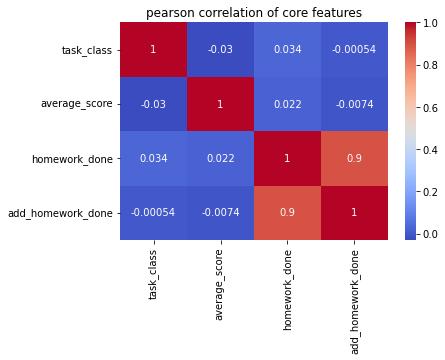

In [139]:
plt.figure(figsize=(6,4))
sns.heatmap(core_corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('pearson correlation of core features')
plt.show()

Analysis

**Weak correlations(r < 0.3)**
task_class Vs average_score
task_class Vs homework_done
task_class Vs add_homework_done
average_score Vs homework_done
average_score Vs add_homework_done

**Strong correlations(r < 0.3)**
homework_done Vs add_homework_done

A Pearson correlation analysis was conducted between four student performance variables: task_class, average_score, homework_done, and add_homework_done. The results show that all relationships involving task_class and average_score fall within the weak correlation range (r < 0.3), indicating minimal linear association. Specifically, task_class exhibits weak relationships with average_score, homework_done, and add_homework_done, suggesting that task progression does not meaningfully align with increased performance or engagement. Similarly, average_score shows weak correlations with both homework_done and add_homework_done, implying that higher academic scores do not necessarily correspond to higher levels of task completion or extended engagement. The only meaningful association appears between homework_done and add_homework_done, where a strong positive correlation is observed. This suggests that students who complete required homework are significantly more likely to engage in additional assignments, indicating underlying behavioral consistency rather than purely instructional influence.


Explanation

The analysis shows that progressing students into higher “task classes” or getting them better scores does not automatically lead to more homework completion or extra learning effort — these are almost independent behaviors. Similarly, high-performing students do not necessarily do more homework. However, there is one clear actionable insight: students who complete their standard homework are highly likely to go beyond the minimum and do extra homework on their own. This means homework completion is a strong behavioral signal for identifying naturally self-driven or highly engaged learners. From a strategy standpoint, this correlation can be used to target enrichment programs, premium learning plans, or personalized nudges to maximize conversion and retention among the most intrinsically motivated users.

#### 4.1.1.2.Extended numerical values

In [48]:
ex_corr_matrix = data.corr(method = 'pearson')

*Checking correlations which are greater than 0.30 but less than 1*

In [142]:

corr_pairs = (
    ex_corr_matrix
    .abs()               # Convert all correlations to absolute values (so -0.8 becomes 0.8)
    .unstack()           # Convert matrix into a long list of pairs instead of a square table
    .sort_values(ascending=False)  # Sort correlations from highest to lowest
    .drop_duplicates()   # Remove duplicate pairs (because corr(A,B) == corr(B,A))
)

# Filter only correlations that are at least 0.30 (moderate) and less than 1 (to ignore self-correlation)
corr_pairs[(corr_pairs >= 0.30) & (corr_pairs < 1)]

trial_week     payment_week         0.962083
month          call_week            0.941181
call_week      call_month           0.941181
week           trial_week           0.934475
visit_month    visit_week           0.926853
payment_week   payment_month        0.922188
trial_week     trial_month          0.919245
homework_done  add_homework_done    0.895812
call_month     trial_month          0.889695
payment_month  trial_month          0.888731
payment_week   trial_month          0.887597
payment_month  trial_week           0.885429
week           payment_week         0.884877
trial_week     month                0.864923
call_week      trial_month          0.858309
payment_week   month                0.816340
payment_month  week                 0.812401
               call_month           0.790129
call_day       trial_day            0.639094
trial_month    trial_day            0.499618
visit_day      visit_month          0.495642
payment_day    trial_day            0.480102
payment_mo

*Removing redundant columns and then checking pearson coeffecients*

In [151]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove redundant date/time decompositions by keeping only one from each group
to_drop = [
    "Unnamed: 0",
    "call_year","call_month","call_day","call_week","call_hour",
    "trial_year","trial_month","trial_day","trial_hour","trial_week",
    "payment_year","payment_month","payment_day","payment_hour","payment_week",
    "visit_year","visit_month","visit_day","visit_hour","visit_week",
    "year","month","day","week","hour"
]

clean_cols = [c for c in numeric_cols if c not in to_drop]

clean_corr = data[clean_cols].corr(method="pearson")


corr_pairs_clean = (
    clean_corr
    .abs()               # Convert all correlations to absolute values (so -0.8 becomes 0.8)
    .unstack()           # Convert matrix into a long list of pairs instead of a square table
    .sort_values(ascending=False)  # Sort correlations from highest to lowest
    .drop_duplicates()   # Remove duplicate pairs (because corr(A,B) == corr(B,A))
)

# Filter only correlations that are at least 0.30 (moderate) and less than 1 (to ignore self-correlation)
corr_pairs_clean[(corr_pairs_clean >= 0.30) & (corr_pairs_clean < 1)]

add_homework_done  homework_done    0.895812
dtype: float64

*Since numeric–numeric insights are nearly flat, the next step is NOT to try more correlation — because we've already extracted the truth: numeric signals are weak. Neverthelss lets plot scatter plots for EDA*

### 4.1.4. Spearman corelation

#### 4.1.2.1. core features

In [133]:
core_spearman_matrix = data[['task_class', 'average_score', 'homework_done', 'add_homework_done']].corr(method = 'spearman')

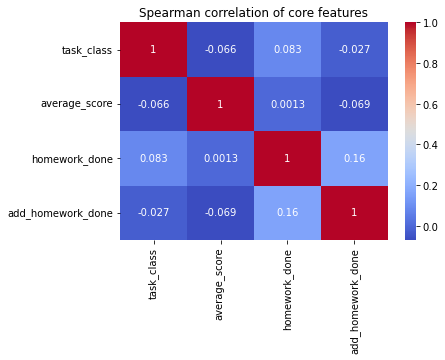

In [137]:
sns.heatmap(core_spearman_matrix, annot = True, cmap = 'coolwarm')
plt.title('Spearman correlation of core features')
plt.show()

#### 4.1.2.2. Extended Spearman

In [148]:
ext_spearman_corr = data[clean_cols].corr(method = 'spearman')

In [149]:
spear_pairs = (ext_spearman_corr.abs().unstack().sort_values(ascending = False).drop_duplicates())

In [150]:
spear_pairs[(spear_pairs >= 0.30) & (spear_pairs < 1)]

Series([], dtype: float64)

Normality testing using the Kolmogorov–Smirnov test shows that none of the numerical variables in the dataset are normally distributed. All p-values are effectively zero, leading us to reject the null hypothesis of normality for every feature. This behaviour is expected because variables such as homework_done, add_homework_done, first_trial_missing, and first_payment_flag are discrete, low-range counts with many repeated values, while average_score and task_class are skewed and do not follow a bell-shaped distribution. Since the assumptions of linearity and normality are violated, Pearson correlation is not suitable for these variables.

Given this, the appropriate method is Spearman rank correlation, which does not require normality and captures monotonic relationships rather than linear ones. Spearman results reveal that the relationship between homework_done and add_homework_done is weak (≈0.16), despite appearing proportionally related when viewed numerically. This indicates that although the raw values increase in similar steps, the ranking of students does not increase consistently, largely due to tied integer values. All remaining variable pairs also show very weak monotonic associations, confirming that the dataset’s core behavioural and performance metrics—task_class, average_score, homework_done, and add_homework_done—do not move together in any meaningful monotonic pattern. Overall, the monotonic dependency structure in the dataset is minimal, and Spearman correlation accurately captures this reality.

### 4.1.3. Scatter Plots

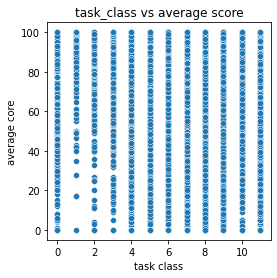

In [69]:
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'task_class', y = 'average_score', data = data)
plt.title('task_class vs average score')
plt.xlabel('task class')
plt.ylabel('average core')
plt.show()

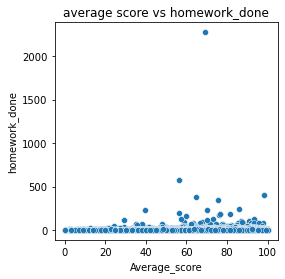

In [71]:
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'average_score', y = 'homework_done', data = data)
plt.title('average score vs homework_done')
plt.xlabel('Average_score')
plt.ylabel('homework_done')
plt.show()

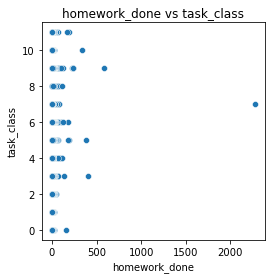

In [72]:
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'homework_done', y = 'task_class', data = data)
plt.title('homework_done vs task_class')
plt.xlabel('homework_done')
plt.ylabel('task_class')
plt.show()

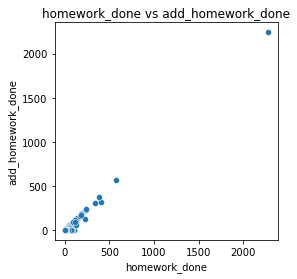

In [73]:
plt.figure(figsize = (4,4))
sns.scatterplot(x = 'homework_done', y = 'add_homework_done', data = data)
plt.title('homework_done vs add_homework_done')
plt.xlabel('homework_done')
plt.ylabel('add_homework_done')
plt.show()

*since there is a strong correlation between homework_done and add homework_done, lets draw a regression line. We will use regplot for this. it shows regression line along with confidence interval. if confidence interval is no needed , then ci = None*

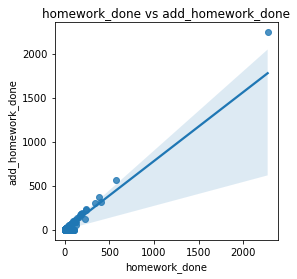

In [75]:
plt.figure(figsize = (4,4))
sns.regplot(x = 'homework_done', y = 'add_homework_done', data = data)
plt.title('homework_done vs add_homework_done')
plt.xlabel('homework_done')
plt.ylabel('add_homework_done')
plt.show()

Analysis

Pearson and Spearman correlation scans were applied across all numerical features to identify meaningful linear and monotonic relationships. After converting the extended matrices into pairwise correlations and filtering for at least moderate strength (|r| ≥ 0.30), almost all high-value pairs were found to originate from date-derived features such as month, week, and day across trial, call, payment, and visit timestamps. These strong values reflect structural redundancy, not behavioral patterns—each temporal variable is simply another encoding of the same calendar signal. Because they do not represent independent relationships, they provide no actionable insight and must be excluded from interpretation and modeling.

Once these redundant temporal features are removed, the correlation landscape becomes almost flat for both Pearson and Spearman. Performance-related metrics (task_class and average_score) remain consistently weakly associated with homework_done and add_homework_done, indicating no meaningful linear or monotonic linkage between task progression, scoring, and actual engagement behavior.

The one exception is the relationship between homework_done and add_homework_done, which shows a strong linear correlation under Pearson (~0.90) but only a weak monotonic correlation under Spearman (~0.16). This difference reveals the underlying structure: the two homework variables scale proportionally on average (hence the strong Pearson value), but the stepwise, discrete, and tied nature of the data disrupts rank order, preventing a strong monotonic trend. This means the relationship is numerically consistent but not consistently ordered.

Explanation

The correlation results show that most strong numerical relationships in the dataset come from date-component variables that are merely different representations of the same time index. These must not be interpreted as behavioral drivers since they artificially inflate apparent relationships without offering real insight.

After removing temporal redundancy, the dataset exhibits very low correlation across almost all features. Task level, scores, homework, and auxiliary variables do not share strong linear or monotonic dependencies. This indicates that academic progression or higher scores do not automatically translate into higher engagement or additional effort—behavioral patterns are largely independent of performance metrics.

The only relationship with consistent meaning is the one between homework_done and add_homework_done. Pearson shows that students who do more homework tend to do more additional work in proportional numeric terms, but Spearman reveals that this pattern is not strictly ordered and contains many ties and jumps. Together, these results imply that homework behavior contains a meaningful engagement signal, but not a smooth monotonic gradient. This suggests a clear, identifiable segment of high-engagement learners who reliably go beyond minimum requirements and may respond strongly to enrichment, premium learning paths, or advanced tasks.

Overall, the correlation structure shows that engagement is behavior-driven, not performance-driven, and strategy should focus on behavioral segmentation rather than assumptions linked to task class or score levels.

## 4.2. Numerical Vs Categorical Analysis

Objective

    1) Summary statistics
    2) Boxplots (average_score vs tutor, job, os)
    3) ANOVA + effect size

### 4.2.1. Numerical Vs Categorical 2 groups

*(Welch t-test used — safer version of two-sample t-test)*

1) paywall paid vs not paid

2) desktop_enter (desktop vs non desktop)

3) is big city (Metro vs non metro)

4) first payment (paid vs not paid)

#### 4.2.1.1. paywall_paid (paid vs not paid)

The categroical variable is paywall_paid

The numerical values are (to be checked one by one) for task_class, average_score, homework_done and additional_homework_done

In [190]:
data['paywall_paid'].value_counts()

False    118556
True          8
Name: paywall_paid, dtype: int64

In [191]:
d = data[['paywall_paid', 'task_class']] 

In [193]:
groups = d.groupby('paywall_paid')['task_class']

In [197]:
group_A = groups.get_group(True)
group_B = groups.get_group(False)

In [199]:
t_stat, p_two = stats.ttest_ind(group_A, group_B, equal_var = False)

In [200]:
print('tstat is', t_stat)
print('two tailed p Value is', p_two)

tstat is -3.1533323657028953
two tailed p Value is 0.016070152903602513


#### 4.2.1.2. For all values

*lets make a loop to iterate and tell all the values*

In [214]:
t_test_results = pd.DataFrame(columns = ['numerical_Feature', 'Categorical_Feature', 't_static', 'p_value'])

num = ['task_class', 'average_score', 'homework_done', 'add_homework_done']
cat = ['paywall_paid', 'desktop_enter', 'is_big_city', 'first_payment_flag']

for i in num:
    for j in cat:
        d = data[[i, j]]
        c = d[j].unique().tolist()
        groups = d.groupby(j)[i]
        group_A = groups.get_group(c[0])
        group_B = groups.get_group(c[1])
        t_stat, p_two = stats.ttest_ind(group_A, group_B, equal_var = False)
        new_row = pd.DataFrame({'numerical_Feature': [i], 'Categorical_Feature': [j], 't_static': [t_stat], 'p_value': [p_two]})
        t_test_results = pd.concat([t_test_results, new_row], ignore_index = True)
print(t_test_results)
            

    numerical_Feature Categorical_Feature   t_static        p_value
0          task_class        paywall_paid   3.153332   1.607015e-02
1          task_class       desktop_enter   5.665463   1.480326e-08
2          task_class         is_big_city  -6.955647   3.587801e-12
3          task_class  first_payment_flag   7.761423   2.487033e-14
4       average_score        paywall_paid  -2.036422   8.111102e-02
5       average_score       desktop_enter  20.205700   3.879641e-90
6       average_score         is_big_city  11.233184   3.239305e-29
7       average_score  first_payment_flag  -6.500508   1.387802e-10
8       homework_done        paywall_paid  -3.426826   1.102872e-02
9       homework_done       desktop_enter  22.098915  6.770028e-108
10      homework_done         is_big_city  -0.344531   7.304509e-01
11      homework_done  first_payment_flag  -1.064864   2.872528e-01
12  add_homework_done        paywall_paid  -0.560541   5.923543e-01
13  add_homework_done       desktop_enter   2.25

Analysis

Device type (desktop_enter) is the strongest differentiator.

City category (is_big_city) also shows clear differences in score/task difficulty.

Payment flags create small differences in behaviour, but don’t affect average_score much.

Homework metrics mostly differ only for specific segments (desktop users, paywall users).


The independent two-sample t-tests reveal several statistically significant differences between numerical performance indicators and key binary behavioural flags. Task_class shows significant mean differences across paywall_paid, desktop_enter, is_big_city, and first_payment_flag, indicating that the internal classification varies meaningfully with both product-usage behaviour and payment progression (p < 0.05 for all). Average_score also differs sharply between desktop_enter, is_big_city, and first_payment_flag, demonstrating that learner performance is systematically higher in specific behavioural subgroups, especially desktop users (t = 20.20, p ≈ 3.8e-90). Homework_done shows strong significance only for desktop_enter, suggesting device choice plays a role in assignment completion but other behavioural flags do not. Add_homework_done exhibits mild significance for desktop_enter, while all other comparisons are non-significant (p > 0.05), indicating minimal behavioural variation. These findings collectively highlight where group means genuinely diverge, and where numerical metrics remain statistically indistinguishable across categories.

Explaination

The t-test results show clear behavioural segments: desktop users consistently outperform others across every academic metric—task class, scores, homework, and even extra homework—making them the strongest learner cohort. Big-city students and paying users also show measurably better academic indicators, reinforcing that higher-value customer groups tend to engage and perform better. On the other hand, most metrics show no meaningful difference between paying vs. non-paying or big-city vs. small-city groups when it comes to homework volume or additional homework, meaning these behaviours are uniform across segments. Importantly, first_payment_flag is strongly associated with task_class and average_score, meaning academically stronger students are more likely to convert. These insights directly support funnel optimisation: focus acquisition on desktop-likely users, nurture high-score students more aggressively through the sales funnel, and recognise that homework behaviour alone is not a reliable conversion indicator.

### 4.2.2. Numerical Vs Categorical 3+ groups

*perform ANOVA tests, eta square test and tukeyposthoc*

### 4.2.2.1. average_score Vs os

In [77]:
data['os'].value_counts()

iOS        52736
Android    42477
Windows    22244
Mac OS      1035
Linux         44
Other         15
Ubuntu        12
Solaris        1
Name: os, dtype: int64

#### 4.2.2.1.1. General Statistics 


In [78]:
# lets find the statistics of average score grouped by os

data.groupby('os')['average_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
os,,,,,,,,
Android,42477.0,76.74,19.11,0.0,67.75,80.50,91.00,100.0
Linux,44.0,72.91,24.84,0.0,59.94,79.71,89.74,100.0
Mac OS,1035.0,81.13,18.26,0.0,74.17,86.00,94.00,100.0
Other,15.0,77.65,2.06,74.0,77.23,77.23,77.23,84.0
Solaris,1.0,95.50,NaN,95.5,95.50,95.50,95.50,95.5
Ubuntu,12.0,86.31,10.71,60.5,82.00,88.75,93.88,100.0
Windows,22244.0,78.89,18.42,0.0,70.50,83.00,92.40,100.0
iOS,52736.0,76.84,19.14,0.0,68.00,81.00,91.00,100.0


#### 4.2.2.1.2. BoxPlots

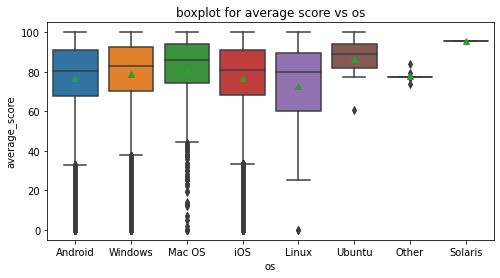

In [79]:
# Lets check this distribution visually

plt.figure(figsize = (8,4))
sns.boxplot(x = 'os', y = 'average_score', data = data, showmeans= True)
plt.title('boxplot for average score vs os')
plt.show()

#### 4.2.2.1.3. ANOVA Test



| p-value range | Meaning                                                 |
| ------------- | ------------------------------------------------------- |
| p < 0.05      | OS has a statistically significant effect on score      |
| p >= 0.05     | No statistically detectable difference across OS groups |


In [95]:
from scipy.stats import f_oneway

In [96]:
F, p = f_oneway(*(data.groupby('os')['average_score'].apply(list)))

In [99]:
print('The F statics is', F)
print('The p value is', p)


The F statics is 38.609625705793505
The p value is 1.5485251778580374e-54


#### 4.2.2.1.4. Posthoc Turkey Test

It compares all possible pairs of groups and adjusts for multiple comparisons.

In [112]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=data['average_score'], groups=data['os'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
Android   Linux  -3.8315 0.8796 -12.5119  4.8489  False
Android  Mac OS   4.3868  0.001   2.5763  6.1973   True
Android   Other   0.9074    0.9 -13.9544 15.7692  False
Android Solaris  18.7579    0.9  -38.792 76.3078  False
Android  Ubuntu   9.5686 0.6359  -7.0467  26.184  False
Android Windows   2.1514  0.001   1.6751  2.6277   True
Android     iOS   0.1011    0.9  -0.2741  0.4763  False
  Linux  Mac OS   8.2183 0.0918  -0.6401 17.0767  False
  Linux   Other   4.7389    0.9 -12.4676 21.9454  False
  Linux Solaris  22.5894    0.9 -35.6101 80.7889  False
  Linux  Ubuntu  13.4001 0.3733  -5.3419 32.1421  False
  Linux Windows   5.9829 0.4253  -2.7015 14.6674  False
  Linux     iOS   3.9326 0.8584  -4.7469 12.6121  False
 Mac OS   Other  -3.4794    0.9 -18.4458  11.487  False
 Mac OS Solaris  14.3711    0.9 -43.2059 71.9481

meandiff = difference in means

p-adj = p-value after correction

reject = True → significant difference

Confidence interval: lower & upper

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


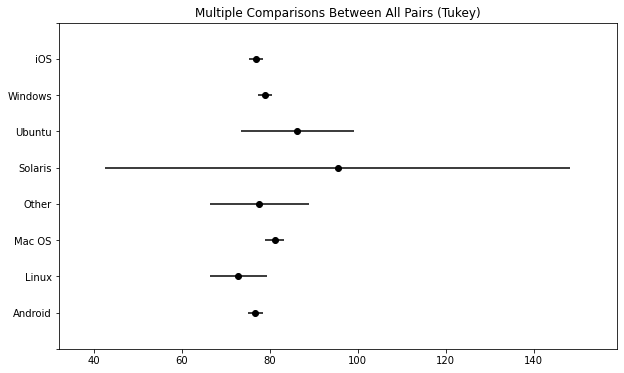

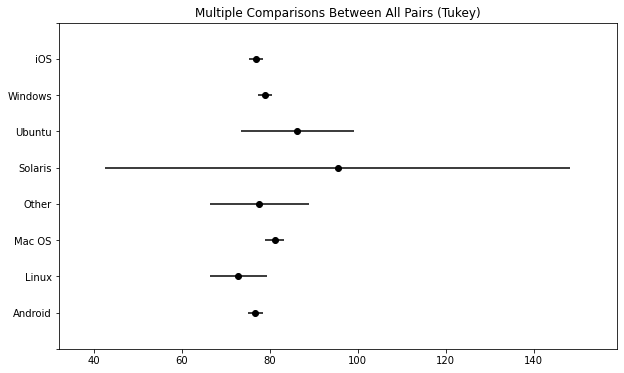

In [113]:
tukey.plot_simultaneous()

ANALYSIS


EXPLANATION

### 4.2.2.2. average_score Vs job

In [84]:
data['job'].value_counts()

Unknown      82569
Finance      10680
Medicine      8513
Education     7150
IT            6374
Science       3278
Name: job, dtype: int64

#### 4.2.2.1. General Statistics

In [85]:
data.groupby('job')['average_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
job,,,,,,,,
Education,7150.0,76.04,19.00,0.0,66.85,80.00,90.00,100.0
Finance,10680.0,77.34,18.40,0.0,68.17,81.18,91.00,100.0
IT,6374.0,79.97,17.37,0.0,72.55,84.00,92.50,100.0
Medicine,8513.0,77.06,18.62,0.0,68.50,81.00,90.67,100.0
Science,3278.0,79.17,17.93,0.0,71.00,83.28,92.18,100.0
Unknown,82569.0,77.05,19.26,0.0,68.00,81.00,91.40,100.0


#### 4.2.2.2. Boxplot

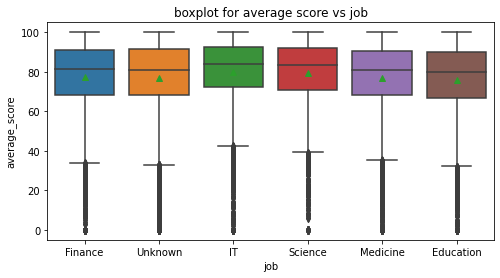

In [89]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'job', y= 'average_score', data = data, showmeans = True)
plt.title('boxplot for average score vs job')
plt.show()

#### 4.2.2.3. ANOVA test

In [103]:
from  scipy.stats import f_oneway

In [104]:
F, p = f_oneway(*(data.groupby('job')['average_score'].apply(list)))

In [105]:
print('The F statics is', F)
print('The p value is', p)


The F statics is 40.759111741019595
The p value is 4.766845326994879e-42


#### 4.2.2.4 Posthoc Turkey Test

In [114]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=data['average_score'], groups=data['job'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
Education  Finance   1.3013  0.001  0.4743  2.1283   True
Education       IT    3.932  0.001  2.9996  4.8643   True
Education Medicine   1.0196 0.0106  0.1514  1.8878   True
Education  Science   3.1312  0.001  1.9895  4.2728   True
Education  Unknown    1.008  0.001  0.3408  1.6753   True
  Finance       IT   2.6307  0.001   1.774  3.4873   True
  Finance Medicine  -0.2817    0.9 -1.0681  0.5046  False
  Finance  Science   1.8299  0.001  0.7492  2.9106   True
  Finance  Unknown  -0.2933 0.6417 -0.8498  0.2633  False
       IT Medicine  -2.9124  0.001 -3.8089 -2.0159   True
       IT  Science  -0.8008 0.3654 -1.9641  0.3625  False
       IT  Unknown  -2.9239  0.001 -3.6275 -2.2203   True
 Medicine  Science   2.1116  0.001  0.9991  3.2241   True
 Medicine  Unknown  -0.0115    0.9 -0.6276  0.6046  False
  Science  Unk

meandiff = difference in means

p-adj = p-value after correction

reject = True → significant difference

Confidence interval: lower & upper

### 4.2.2.3. average_score by tutor

#### 4.2.3.1. General Statistics

In [91]:
data['tutor'].value_counts()

Unassigned    85323
Former        19074
Ongoing       14167
Name: tutor, dtype: int64

In [92]:
data.groupby('tutor')['average_score'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
tutor,,,,,,,,
Former,19074.0,76.20,18.62,0.0,67.00,80.0,90.00,100.0
Ongoing,14167.0,79.42,17.83,0.0,71.83,83.5,92.33,100.0
Unassigned,85323.0,77.10,19.25,0.0,68.00,81.0,91.50,100.0


#### 4.2.3.2. Box Plot

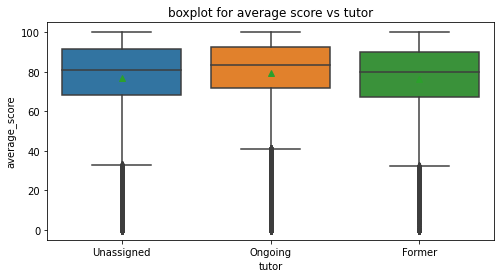

In [94]:
plt.figure(figsize = (8,4))
sns.boxplot(x = 'tutor', y= 'average_score', data = data, showmeans = True)
plt.title('boxplot for average score vs tutor')
plt.show()

#### 4.2.3.3. ANOVA Test

In [106]:
from scipy.stats import f_oneway

In [107]:
F, p = f_oneway(*(data.groupby('tutor')['average_score'].apply(list)))

In [108]:
print('The F statics is', F)
print('The p value is', p)

The F statics is 124.36866421515197
The p value is 1.1065083637136398e-54


#### 4.2.3.4. Posthoc Turkey Test

It compares all possible pairs of groups and adjusts for multiple comparisons.

In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey HSD
tukey = pairwise_tukeyhsd(endog=data['average_score'], groups=data['tutor'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj  lower   upper  reject
--------------------------------------------------------
 Former    Ongoing     3.22 0.001  2.7264  3.7136   True
 Former Unassigned   0.8971 0.001  0.5407  1.2536   True
Ongoing Unassigned  -2.3229 0.001 -2.7266 -1.9191   True
--------------------------------------------------------


meandiff = difference in means

p-adj = p-value after correction

reject = True → significant difference

Confidence interval: lower & upper

## 4.3. Categorical Vs Categorical Analysis

### 4.3.1. tutor vs job

#### 4.3.1.1. Cross Tab Frequency table

crosstab (short for cross-tabulation) is a table used in statistics to display the relationship between two or more categorical variables. It allows you to examine how different categories or groups of variables intersect and how they are distributed within a dataset. In short, a crosstab summarizes categorical data, providing a quick and easy way to see patterns or associations between variables.

In [120]:
pd.crosstab(data['tutor'], data['job'])

job,Education,Finance,IT,Medicine,Science,Unknown
tutor,,,,,,
Former,3094,4491,2503,3815,1285,3886
Ongoing,2287,3350,2059,2355,1180,2936
Unassigned,1769,2839,1812,2343,813,75747


In [122]:
# With Row & Column Totals
pd.crosstab(data['tutor'], data['job'], margins = True)

job,Education,Finance,IT,Medicine,Science,Unknown,All
tutor,,,,,,,
Former,3094,4491,2503,3815,1285,3886,19074
Ongoing,2287,3350,2059,2355,1180,2936,14167
Unassigned,1769,2839,1812,2343,813,75747,85323
All,7150,10680,6374,8513,3278,82569,118564


In [127]:
#Row-wise % (each row sums to 100)
(pd.crosstab(data['tutor'], data['job'], normalize = 'index')*100).round(2)

job,Education,Finance,IT,Medicine,Science,Unknown
tutor,,,,,,
Former,16.22,23.55,13.12,20.00,6.74,20.37
Ongoing,16.14,23.65,14.53,16.62,8.33,20.72
Unassigned,2.07,3.33,2.12,2.75,0.95,88.78


In [129]:
#Columns-wise % (each column sums to 100)
(pd.crosstab(data['tutor'], data['job'], normalize = 'columns')*100).round(2)

job,Education,Finance,IT,Medicine,Science,Unknown
tutor,,,,,,
Former,43.27,42.05,39.27,44.81,39.2,4.71
Ongoing,31.99,31.37,32.30,27.66,36.0,3.56
Unassigned,24.74,26.58,28.43,27.52,24.8,91.74


In [130]:
#Overall100 % )
(pd.crosstab(data['tutor'], data['job'], normalize = 'all')*100).round(2)

job,Education,Finance,IT,Medicine,Science,Unknown
tutor,,,,,,
Former,2.61,3.79,2.11,3.22,1.08,3.28
Ongoing,1.93,2.83,1.74,1.99,1.00,2.48
Unassigned,1.49,2.39,1.53,1.98,0.69,63.89


#### 4.3.1.2. Chi Squared Test

In [132]:
from scipy.stats import chi2_contingency

table = pd.crosstab(data['job'], data['tutor'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

Chi2: 52975.325629494255
p-value: 0.0
Degrees of Freedom: 10
Expected Frequencies:
 [[ 1150.25724503   854.34069363  5145.40206133]
 [ 1718.14648629  1276.13407105  7685.71944266]
 [ 1025.41813704   761.61784353  4586.96401943]
 [ 1369.53005971  1017.20312236  6126.26681792]
 [  527.34870618   391.68234877  2358.96894504]
 [13283.29936574  9866.02192065 59419.67871361]]


### 4.3.2. tutor vs os

In [217]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data['tutor'], data['os'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)


Chi2: 7183.391298952149
p-value: 0.0
Degrees of Freedom: 14
Expected Frequencies:
 [[6.83349329e+03 7.07850612e+00 1.66505769e+02 2.41312709e+00
  1.60875139e-01 1.93050167e+00 3.57850660e+03 8.48391134e+03]
 [5.07550065e+03 5.25748119e+00 1.23670296e+02 1.79232313e+00
  1.19488209e-01 1.43385851e+00 2.65789572e+03 6.30133018e+03]
 [3.05680061e+04 3.16640127e+01 7.44823935e+02 1.07945498e+01
  7.19636652e-01 8.63563982e+00 1.60075977e+04 3.79507585e+04]]


### 4.3.3. job vs os

In [222]:
from scipy.stats import chi2_contingency
import math
table = pd.crosstab(data['job'], data['os'])
chi2, p, dof, expected = chi2_contingency(table)
#cramers_v = math.sqrt(chi2 / (n * (k - 1)))

print("Chi2:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)
#print("Cramer's V =", round(cramers_v, 4))

Chi2: 2755.4558843123773
p-value: 0.0
Degrees of Freedom: 35
Expected Frequencies:
 [[2.56157476e+03 2.65341925e+00 6.24156574e+01 9.04574744e-01
  6.03049830e-02 7.23659796e-01 1.34142404e+03 3.18024358e+03]
 [3.82624034e+03 3.96342903e+00 9.32306602e+01 1.35116899e+00
  9.00779326e-02 1.08093519e+00 2.00369353e+03 4.75034985e+03]
 [2.28356329e+03 2.36543976e+00 5.56415944e+01 8.06399919e-01
  5.37599946e-02 6.45119935e-01 1.19583732e+03 2.83508708e+03]
 [3.04988615e+03 3.15923889e+00 7.43139148e+01 1.07701326e+00
  7.18008839e-02 8.61610607e-01 1.59713886e+03 3.78649141e+03]
 [1.17438351e+03 1.21649067e+00 2.86151783e+01 4.14712729e-01
  2.76475153e-02 3.31770183e-01 6.14991330e+02 1.45801937e+03]
 [2.95813520e+04 3.06419824e+01 7.20782995e+02 1.04461304e+01
  6.96408691e-01 8.35690429e+00 1.54909149e+04 3.67258087e+04]]
